#37. Generators and iterators || Generadores e iteradores
lazy initialization of a collection of elements
- objects are produced only upon request
- iterable object - everything that can be formed by a loop
- iterator - an object that performs an action in a loop
- generator - the simplest way to create iterators
- methods for creating generators
    - by generator expression
    - by function

inicialización diferida de una colección de elementos
- los objetos se producen sólo bajo pedido
- objeto iterable - todo lo que puede formarse mediante un bucle
- iterador - un objeto que realiza una acción en un bucle
- generador: la forma más sencilla de crear iteradores
- métodos para crear generadores
    - por expresión generadora
    - por función

In [ ]:
# generator, not tuple / generador, no tupla
g01 = ((i + 1) ** 3 for i in range(5))
for el in [(None, 7), (7, 14), (14, 21), (21, 28), (28, None)]:
    print(dir(g01)[slice(*el)])

['__class__', '__del__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__']
['__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__']
['__le__', '__lt__', '__name__', '__ne__', '__new__', '__next__', '__qualname__']
['__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
['close', 'gi_code', 'gi_frame', 'gi_running', 'gi_yieldfrom', 'send', 'throw']


In [ ]:
# print values / imprimir valores
print(*g01)
# the object was unloaded during iteration
# el objeto fue descargado durante la iteración
list(g01)

1 8 27 64 125


[]

In [ ]:
# uploading with data type definition
# cargar con definición de tipo de datos
(list((i + 1) ** 3 for i in range(5)),
 tuple((i ** 2) for i in range(7)),
 set((i ** 3 ) for i in range(3)))

([1, 8, 27, 64, 125], (0, 1, 4, 9, 16, 25, 36), {0, 1, 8})

In [ ]:
# ! the generator can be started once
# ! el generador se puede arrancar una vez
g02 = ((i + 1) ** 3 for i in range(5))
print(g02.gi_frame)
print(list(g02))
print(g02.gi_frame)

<frame at 0x7b3ea2438d60, file '<ipython-input-4-ceb6a424a9dd>', line 3, code <genexpr>>
[1, 8, 27, 64, 125]
None


In [ ]:
# list expressions vs generator expressions
# expresiones de listas vs expresiones generadoras
import cProfile
print(cProfile.run('sum([i ** 2 for i in range(10000)])'))
print(cProfile.run('sum(i ** 2 for i in range(10000))'))

         5 function calls in 0.006 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.006    0.006    0.006    0.006 <string>:1(<listcomp>)
        1    0.000    0.000    0.006    0.006 <string>:1(<module>)
        1    0.000    0.000    0.006    0.006 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


None
         10005 function calls in 0.011 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10001    0.009    0.000    0.009    0.000 <string>:1(<genexpr>)
        1    0.000    0.000    0.011    0.011 <string>:1(<module>)
        1    0.000    0.000    0.011    0.011 {built-in method builtins.exec}
        1    0.002    0.002    0.011    0.011 {built-in method builtins.sum}
        1    0.000   

In [ ]:
# the sequence generator
# el generador de secuencia
import sys
def n_gen(n):
    num = 0
    while num < n:
        # it pauses calculations until next() will be called
        # pausa los cálculos hasta que se llame a next()
        yield num
        num += 1
n_sum = sum(n_gen(10e6))
print(n_sum)
print(sys.getsizeof(n_gen(10e6)))

49999995000000
104


Iterators actions:
- returning the data from a stream or container (one item at a time)
- keeping track of the current and visited items

Acciones de iteradores:
- devolver los datos de una secuencia o contenedor (un elemento a la vez)
- realizar un seguimiento de los elementos actuales y visitados

In [ ]:
# the object-oriented iterator, corresponding to the generator `n_gen`
# el iterador orientado a objetos, correspondiente al generador `n_gen`
import sys
class n_iter:
    def __init__(self, n):
        self.n = n
        self.number = 0
    def __iter__(self):
        return self
    def __next__(self):
        if self.number < self.n:
            cur_number = self.number
            self.number += 1
            return cur_number
        else:
            raise StopIteration()
n_sum = sum(n_iter(10e6))
print(n_sum)
print(sys.getsizeof(n_iter(10e6)))

49999995000000
48


In [ ]:
# the sequence generator for nested lists
# el generador de secuencia para listas anidadas
def chained_gen(sequences):
    for seq in sequences:
        yield from seq
lst3 = [[2, 4, 6], [1, 3, 5], [100, 200, 300]]
print(list(chained_gen(lst3)))

[2, 4, 6, 1, 3, 5, 100, 200, 300]


In [ ]:
# generators inside generators
# generadores dentro de generadores
def prime_divs_gen(n):
    d = 2
    while n > 1:
        while n % d == 0:
            yield d
            n = n // d
        d += 1
print(list(prime_divs_gen(18361258)))
def power_gen(n, m):
    for i in n:
        yield i**m
%time
dpg = power_gen(prime_divs_gen(18361258), 10)
print(list(dpg))

[2, 17, 19, 43, 661]
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
[1024, 2015993900449, 6131066257801, 21611482313284249, 15922622355555940184939928601]


In [ ]:
# the simplest recursive generator
# el generador recursivo más simple
def recursive_gen(lst):
    if lst:
        yield lst[0]
        yield from recursive_gen(lst[1:])
for k in recursive_gen([1, 2, 3, 4]):
    print(k, end=' ')

1 2 3 4 

In [ ]:
# create a recursive generator
# crear un generador recursivo
# case 1 / caso 1
gcd_lambda = lambda a, b: a if b == 0 else gcd_lambda(b, a % b)
print(gcd_lambda(2197, 52))
def gcd(a, b):
    if b == 0: return a
    else: return gcd(b, a % b)
print(gcd(2197, 52))
def gcd_gen(a, b):
    if b == 0: yield a
    else: yield from gcd_gen(b, a % b)
print(next(gcd_gen(2197, 52)))

13
13
13


In [ ]:
# case 2 / caso 2
sum_digits_lambda = lambda n: n if n < 10 else sum_digits_lambda(n // 10) + n % 10
print(sum_digits_lambda(12345654321))
def sum_digits1(n):
    if n < 10: return n
    else: return sum_digits1(n // 10) + n % 10
print(sum_digits1(12345654321))
def sum_digits2(n, summation=0):
    if n < 10: return n + summation
    else: return sum_digits2(n // 10, summation + n % 10)
print(sum_digits2(12345654321))
def sum_digits_gen(n, summation=0):
    if n < 10: yield n + summation
    else: yield from sum_digits_gen(n // 10, summation + n % 10)
print(next(sum_digits_gen(12345654321)))

36
36
36
36


In [ ]:
# case 3 / caso 3
def permutation_gen(lst):
    n = len(lst)
    if n <= 1: yield lst
    else:
        for p in permutation_gen(lst[1:]):
            for i in range(n):
                yield p[:i] + lst[:1] + p[i:]
pg = permutation_gen([1, 2, 3, 4])
print(list(pg)[:7])

[[1, 2, 3, 4], [2, 1, 3, 4], [2, 3, 1, 4], [2, 3, 4, 1], [1, 3, 2, 4], [3, 1, 2, 4], [3, 2, 1, 4]]


In [ ]:
#  case 4 / caso 4
def k_permutation_gen(values, k):
    if k==0:
        yield []
    else:
        for v in values:
            for p in k_permutation_gen(values, k-1):
                if v not in p:
                    yield [v] + p
pkg = k_permutation_gen([1 ,2, 3, 4], 3)
print(list(pkg)[:7])

[[1, 2, 3], [1, 2, 4], [1, 3, 2], [1, 3, 4], [1, 4, 2], [1, 4, 3], [2, 1, 3]]


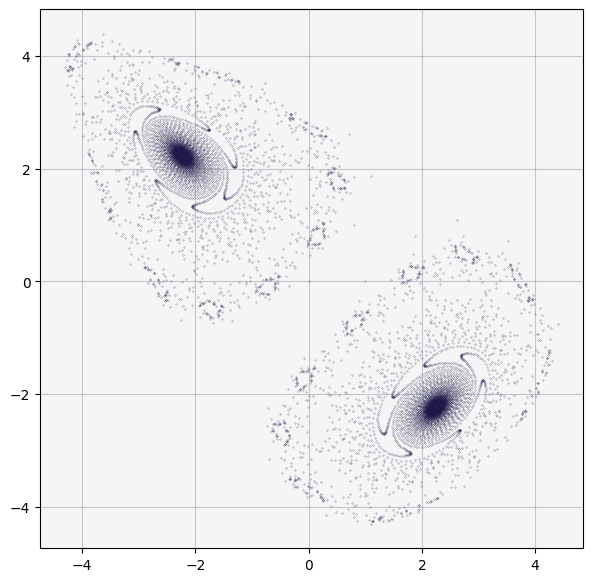

In [ ]:
# generators for recurrence tables
# generadores de tablas de recurrencia
def gen(start=[0., 0.], max=10**12):
    n = 1; xyn = start
    while n <= max:
        yield xyn
        n+=1; xn, yn = xyn[0], xyn[1]
        xyn = [1 - .2 * xn**2 + yn, .9991 * xn]
N = 10000; XY = gen(max=N)
import numpy, pylab
xy = numpy.array(list(XY))
pylab.figure(figsize=(7, 7))
ax = pylab.gca()
ax.set_facecolor('whitesmoke')
pylab.scatter(
    xy[:,0], xy[:,1], s=.03,
    color=(.3*numpy.random.random(3)).tolist())
pylab.grid(c='slategray', alpha=.4);

In [ ]:
def countdown_gen1(n):
    while n > 0:
        yield n
        n -= 1
cg1 = countdown_gen1(7)
for i in range(3): print(next(cg1))
print(30 * '=')
cg1.close()
try: print(next(cg1))
except StopIteration:
    print(list(cg1))
    print('this generator was closed')
def countdown_gen2(x):
    if (x > 0):
        print(x, end=' ')
        yield x
        yield from countdown_gen2(x -1)
cg2 = countdown_gen2(7)
print(list(cg2))
try: print(next(cg2))
except StopIteration:
    print(list(cg2))
    print('this generator was emptied')

7
6
5
[]
this generator was closed
7 6 5 4 3 2 1 [7, 6, 5, 4, 3, 2, 1]
[]
this generator was emptied


In [1]:
# the iterator and the iterable object are the same
# el iterador y el objeto iterable son iguales
class RangeReset:
    def __init__(self, start, end, step):
        self.start = start
        self.end = end
        self.step = step
    def __iter__(self):
        return RangeIter(self.start, self.end, self.step)
class RangeIter:
    def __init__(self, start, end, step):
        self.start = start
        self.end = end
        self.step = step
    def __iter__(self):
        return self
    def __next__(self):
        if self.start < self.end:
            i = self.start
            self.start += self.step
            return i
        else:
            raise StopIteration()
rr = RangeReset(-1, 3, .5)
print(tuple(rr), list(rr), set(rr), sep='\n')

(-1, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5)
[-1, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
{-0.5, 0.0, 1.0, 0.5, 1.5, 2.0, 2.5, -1}


In [ ]:
class ResetCounter:
    def __init__(self, num):
        self.num = num
        self.i = -1
    def __iter__(self):
        if self.i == self.num - 1:
            print('this iterator was restarted')
            return self.__class__(self.num)
        return self
    def __next__(self):
        if self.i == self.num - 1:
            raise StopIteration
        if self.i <= self.num - 1:
            self.i += 1
            return self.i
rc10 = ResetCounter(10)
for i in rc10: print(i, end=' ')
print(); print(30 * '=')
for i in rc10: print(i, end=' ')

0 1 2 3 4 5 6 7 8 9 
this iterator was restarted
0 1 2 3 4 5 6 7 8 9 

In [ ]:
class  ResetStepCounter:
    def __init__(self, start=0, stop=None, step=1):
        if stop is None:
            stop, start = start, 0
        self._range = range(start, stop, step)
        self._iter = iter(self._range)
    def __iter__(self):
        return self
    def __next__(self):
        try:
            return next(self._iter)
        except StopIteration:
            self._iter = iter(self._range)
            raise
rsc10_100_5 = ResetStepCounter(10, 100, 5)
for i in rsc10_100_5: print(i, end=' ')
print(); print(60 * '=')
for i in rsc10_100_5: print(i, end=' ')

10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 
10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

In [ ]:
# generators with restarting
# generadores con reinicio
class CountRestart(Exception): pass
def counter(start, step):
    current_count = start
    while current_count:
        try:
            yield current_count
            current_count += step
        except CountRestart:
            print('this counter will be restarted')
            current_count = start - step
counting = counter(100, 5)
for i in range(5): print(next(counting))
print(30 * '=')
print(counting.throw(CountRestart()))
print(30 * '=')
for i in range(5): print(next(counting))

100
105
110
115
120
this counter will be restarted
95
100
105
110
115
120


In [ ]:
def pool_value_gen(value, amount):
    while True:
        print(f"current {value = }, current {amount = }")
        value = yield amount
        amount += value
        print(f"received {value = }, updated {amount = }")
pvg = pool_value_gen(0, 100)
print(40 * "-" + "\ninitialize the generator before sending!\n" + 40 * "-")
next(pvg)
print(40 * "-" + "\nthe sending process\n'" + 40 * "-")
for value in range(20, 50, 10):
    print(40 * "=")
    print(f"{value = }, {pvg.send(value) = }")
    print(40 * "=" + "\n")
result = pvg.send(1000)
print(result)

----------------------------------------
initialize the generator before sending!
----------------------------------------
current value = 0, current amount = 100
----------------------------------------
the sending process
'----------------------------------------
received value = 20, updated amount = 120
current value = 20, current amount = 120
value = 20, pvg.send(value) = 120

received value = 30, updated amount = 150
current value = 30, current amount = 150
value = 30, pvg.send(value) = 150

received value = 40, updated amount = 190
current value = 40, current amount = 190
value = 40, pvg.send(value) = 190

received value = 1000, updated amount = 1190
current value = 1000, current amount = 1190
1190


Finite and infinite iterators

Iteradores finitos e infinitos

In [ ]:
# finite sequences and iterators
# secuencias e iteradores finitos
def factorial_gen1(n):
    a, i = 1, 2; yield a
    while i <= n:
        a *= i; i += 1; yield a
fg1 = factorial_gen1(7)
print(list(fg1))
def factorial_gen2(start=0, end=10):
    if start == 0:
        start += 1; yield start
    for i in range(start, end+1):
        start *= i; yield start
fg2 = factorial_gen2(end=7)
print(list(fg2))
factorial_lambda = lambda n: 1 if n <= 1 else n * factorial_lambda(n - 1)
print(factorial_lambda(7))

[1, 2, 6, 24, 120, 720, 5040]
[1, 1, 2, 6, 24, 120, 720, 5040]
5040


In [ ]:
# infinite sequences and iterators
# secuencias e iteradores infinitos
def factorial_inf(n, k):
    yield (n-1, k)
    yield from factorial_inf(n+1, n*k)
fi = factorial_inf(1, 1)
for i in range(7): (print(next(fi)))

(0, 1)
(1, 1)
(2, 2)
(3, 6)
(4, 24)
(5, 120)
(6, 720)


In [ ]:
# finite sequences and iterators
# secuencias e iteradores finitos
def fibonacci_gen1(n):
    x, y = 0, 1; yield 0
    for _ in range(n-1):
        x, y = y, x + y
        yield x
fg3 = fibonacci_gen1(7)
print(list(fg3))

[0, 1, 1, 2, 3, 5, 8]


In [ ]:
# infinite sequences and iterators
# secuencias e iteradores infinitos
class FibonacciSeries:
    def __init__(self):
        self.cache = {}
    def __call__(self,n):
        if n not in self.cache:
            if n in [0, 1]:
                self.cache[n] = n
            else:
                self.cache[n] = self.__call__(n-1) + self.__call__(n-2)
        return self.cache[n]
fs = FibonacciSeries()
for i in range(7): print(fs(i), end= ' ')
print()
def fibonacci_gen2(x, y):
    yield (x, y)
    yield from fibonacci_gen2(y, x + y)
fg4 = fibonacci_gen2(0, 1)
for i in range(7): print(next(fg4))

0 1 1 2 3 5 8 
(0, 1)
(1, 1)
(1, 2)
(2, 3)
(3, 5)
(5, 8)
(8, 13)


In [ ]:
# infinite generators with counters
# generadores infinitos con contadores
def fibonacci_gen3(x, y, stop_index=10):
    index = 0; yield x
    while True:
        if index == stop_index:
            return
        else:
            index += 1
            x, y = y, x + y
            yield x
fg5 = fibonacci_gen3(0, 1)
print(*fg5)

0 1 1 2 3 5 8 13 21 34 55


Methods of iterable objects

Métodos de objetos iterables

In [ ]:
def is_iterable1(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False
def is_iterable2(obj):
    try:
        for i in obj: pass
        return True
    except TypeError:
        return False
(is_iterable1([1, 2, 3]), is_iterable2([1, 2, 3]),
 is_iterable1('1, 2, 3'), is_iterable2('1, 2, 3'))

(True, True, True, True)

In [ ]:
# the iterators reflect object changes
# los iteradores reflejan cambios de objetos
dict1 = {"color": "red", "fruit": "apple", "pet": "cat"}
dict1_items = dict1.items()
dict1_keys, dict1_values = dict1.keys(), dict1.values()
dict1['color'] = 'green'
dict1['number'] = 'one'
print(dict1_items, dict1_keys, dict1_values, sep='\n')

dict_items([('color', 'green'), ('fruit', 'apple'), ('pet', 'cat'), ('number', 'one')])
dict_keys(['color', 'fruit', 'pet', 'number'])
dict_values(['green', 'apple', 'cat', 'one'])


Built-in capabilities for iterator construction

Capacidades integradas para la construcción de iteradores

In [ ]:
r10 = range(1,11)
ir10 = iter(r10)
il10 = iter(list(r10))
e10 = enumerate(r10)
g10 = (i for i in range(1,11))
print(r10, list(r10), tuple(r10), set(r10))
print(ir10, list(ir10), tuple(ir10), set(ir10))
print(il10, list(il10), tuple(il10), set(il10))
print(e10, list(e10), tuple(e10), set(e10))
print(g10, list(g10), tuple(g10), set(g10))

range(1, 11) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] (1, 2, 3, 4, 5, 6, 7, 8, 9, 10) {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
<range_iterator object at 0x7b3e910b2d60> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] () set()
<list_iterator object at 0x7b3e910b3a00> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] () set()
<enumerate object at 0x7b3e9079da80> [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)] () set()
<generator object <genexpr> at 0x7b3e91ef2ea0> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] () set()


In [ ]:
# zip iterators / zip iteradores
fruits = ['apple', 'banana', 'cherry']
quantities = [5, 10, 30]
z = zip(fruits, quantities)
print(z, list(z))

<zip object at 0x7b3e9079ef40> [('apple', 5), ('banana', 10), ('cherry', 30)]


Transformations `map()`
- applies the transform function to the iteration
- creates a new iteration of the transformed elements

Transformaciones `map()`
- aplica la función de transformación a la iteración
- crea una nueva iteración de los elementos transformados

In [ ]:
# iterators inside map iterators
# iteradores dentro de iteradores del mapa
squared = lambda y: map(lambda x: x**2, y)
sq23 = squared((i**3 for i in range(7)))
print(sq23, list(sq23))

<map object at 0x7b3e910b34f0> [0, 1, 64, 729, 4096, 15625, 46656]


In [ ]:
# comparison of generator-transformers with map()
# comparación de generadores-transformadores con map()
def map_gen(function, iterable):
    for args in iterable:
        yield function(*args)
print(list(map_gen(pow, [(2, 8), (5, 3), (6, 4)])))
print(list(map(pow, (2, 8), (5, 3), (6, 4))))
print(list(map(pow, [2, 5, 6], [8, 3, 4])))

[256, 125, 1296]
[2, 0]
[256, 125, 1296]


In [ ]:
# the iterable objects (to be converted) are not necessarily the same length
# los objetos iterables (a convertir) no tienen necesariamente la misma longitud
lst1 = [1, 2, 3]
lst2 = [1, 2, 3, 4]
print(list(map(pow, lst1, lst2)))

[1, 4, 27]


In [ ]:
# transformations with many variables
# transformaciones con muchas variables
lst3 = [[2, 4, 6], [1, 3, 5], [100, 200, 300]]
list(map(lambda x, y, z: x + y + z, *lst3))

[103, 207, 311]

In [ ]:
# transformations using object methods
# transformaciones usando métodos de objetos
string = "Have you already set your goals for the New Year".split()
print(list(map(str.capitalize, string)))
print(list(map(str.upper, string)))
print(list(map(str.lower, string)))

['Have', 'You', 'Already', 'Set', 'Your', 'Goals', 'For', 'The', 'New', 'Year']
['HAVE', 'YOU', 'ALREADY', 'SET', 'YOUR', 'GOALS', 'FOR', 'THE', 'NEW', 'YEAR']
['have', 'you', 'already', 'set', 'your', 'goals', 'for', 'the', 'new', 'year']


In [ ]:
# use imported functions for iterator construction
# usar funciones importadas para la construcción de iteradores
import math, random
random_gen = lambda n: (random.randint(1,10) for i in range(n))
print(list(map(math.factorial, random_gen(7))))

[120, 40320, 5040, 24, 120, 6, 24]


In [ ]:
import re
def remove_punctuation(word):
    return re.sub(r'[!?.:;,"()-]', "", word)
string = "Have you already set your goals for the New Year?\n"
string += "Do you want to lose ten kilos, \n"
string += "run a marathon or speak fluent English?"
# split by rows / dividir por filas
string = string.split('\n')
print(*string, sep='\n')
# split by whitespaces / dividir por espacios en blanco
map_obj = map(str.split, string)
# create a one-dimensional list / crear una lista unidimensional
string_lst = sum(list(map_obj), [])
print(string_lst[:11])
# map the user function / mapear la función del usuario
print(list(map(remove_punctuation, string_lst))[:11])

Have you already set your goals for the New Year?
Do you want to lose ten kilos, 
run a marathon or speak fluent English?
['Have', 'you', 'already', 'set', 'your', 'goals', 'for', 'the', 'New', 'Year?', 'Do']
['Have', 'you', 'already', 'set', 'your', 'goals', 'for', 'the', 'New', 'Year', 'Do']


In [ ]:
# ways to replace map() / formas de reemplazar map()
print(list(map(pow, [2, 8], [5, 3])))
# to the list expression / a la expresión de lista
print([x**y for x, y in zip([2, 8], [5, 3])])
# to the generator / al generador
print(list(x**y for x, y in zip([2, 8], [5, 3])))

[32, 512]
[32, 512]
[32, 512]


Generator-functions (for example, `reversed()`)

Funciones generadoras (por ejemplo, `reversed()`)

In [ ]:
lst_r = reversed([1, 2, 3, 4, 5])
print(lst_r, tuple(lst_r))
str_r = reversed('12345')
str_r, tuple(str_r)

<list_reverseiterator object at 0x7b3e90799d50> (5, 4, 3, 2, 1)


(<reversed at 0x7b3e9079a200>, ('5', '4', '3', '2', '1'))

Filtering `filter()`
- applies a predicate or a function with a boolean value to an iteration
- creates a new iteration containing elements that satisfy the logical condition

Filtrado `filter()`
- aplica un predicado o una función con un valor booleano a una iteración
- crea una nueva iteración que contiene elementos que satisfacen la condición lógica

In [ ]:
# determination of the truth of objects
# determinación de la verdad de los objetos
obj1 = [0, {}, 1, [], 4 > 3, complex(.5), "", None, float(8), int(-1.5)]
print(list(filter(None, obj1)))
obj2 = [1j, list(), bool(1), set(), 4 < 3, .5, "".__len__(), 8, -1.5]
print(list(filter(None, obj2)))

[1, True, (0.5+0j), 8.0, -1]
[1j, True, 0.5, 8, -1.5]


!Note

Python follows a set of rules to determine whether an object is true

For example, the following objects are false:
- 1) Constants of type None and False
- 2) Numeric types with null value 0, 0.0, 0j, Decimal(0) and Fraction(0, 1)
- 3) Empty collections "", (), [], {}, set() and range(0)
- 4) Objects that implement
  - ` __bool__()` returning False
  - ` __len__()` with return value 0

  Any other object will be considered truthful

!Nota

Python sigue un conjunto de reglas para determinar si un objeto es verdadero

Por ejemplo, los siguientes objetos son falsos:
- 1) Constantes de tipo None y False
- 2) Tipos numéricos con valor nulo 0, 0.0, 0j, Decimal(0) y Fraction(0, 1)
- 3) Colecciones vacías "", (), [], {}, set() y range(0)
- 4) Objetos que implementan
  - ` __bool__() ` devuelve Falso
  - ` __len__() ` con valor de retorno 0

Cualquier otro objeto se considerará veraz

In [ ]:
# use anonymous functions
# usar funciones anónimas
print(list(filter(lambda n: n > 0, [25, 9, 81, -16, 0, -24])))
print(list(filter(lambda n: n % 2 == 0, range(7))))

[25, 9, 81]
[0, 2, 4, 6]


In [ ]:
# the custom generator-function with a single value for primes
# el generador-función personalizado con un solo valor para primos
def is_prime_gen(n):
    if n <= 1: yield False
    for i in range(2, int(n**.5) + 1):
        if n % i == 0: yield False #; break
    yield True
for i in range(13):
    print(i, list(is_prime_gen(i)))

0 [False, True]
1 [False, True]
2 [True]
3 [True]
4 [False, True]
5 [True]
6 [False, True]
7 [True]
8 [False, True]
9 [False, True]
10 [False, True]
11 [True]
12 [False, False, True]


In [ ]:
(bool(i for i in range(0)),
 list(i for i in range(0)),
 type(i for i in range(0)),
 bool(range(0)),
 list(range(0)),
 type(range(0)))

(True, [], generator, False, [], range)

In [ ]:
def is_prime(n):
    if n <= 1: return False
    for i in range(2, int(n**.5) + 1):
        if n % i == 0: return False #; break
    return True
for i in range(13):
    print(i, is_prime(i))
# filtering will not work with a generator of the same structure
# el filtrado no funcionará con un generador de la misma estructura
print(list(filter(is_prime, range(13))))

0 False
1 False
2 True
3 True
4 False
5 True
6 False
7 True
8 False
9 False
10 False
11 True
12 False
[2, 3, 5, 7, 11]


In [ ]:
# ways to replace filter() / formas de reemplazar filter()
lst = [1, 20, -3, 14, 5]
print(list(filter(lambda x: x > 3, lst)))
# to the list expression / a la expresión de lista
print([x for x in lst if x > 3])
# to the generator / al generador
print(list(x for x in lst if x > 3))

[20, 14, 5]
[20, 14, 5]
[20, 14, 5]


Readers of iterators

Lectores de iteradores

In [ ]:
# it produces a tuple of n generators
# produce una tupla de n generadores
from itertools import tee
a, b, c = tee((i for i in range(5)), 3)
print(a)
print(list(a), set(b), tuple(c))
print(list(a), set(b), tuple(c))

[0, 1, 2, 3, 4] {0, 1, 2, 3, 4} (0, 1, 2, 3, 4)
[] set() ()


In [ ]:
# any, all, sum, max, min return a single value
# any, all, sum, max, min devuelven un valor único
from random import choice
from itertools import tee
zero_gen1, zero_gen2 = tee((0 for i in range(7)), 2)
one_gen1, one_gen2 = tee((1 for i in range(7)), 2)
range_gen1, range_gen2, range_gen3 = tee((i for i in range(7)), 3)
random_gen1, random_gen2 = tee((choice([0,1]) for i in range(7)), 2)
print(all(zero_gen1), all(one_gen1))
print(any(zero_gen2), any(one_gen1), any(one_gen2))
print(sum(range_gen1), max(range_gen2), min(range_gen3))
print(list(random_gen1), list(random_gen2))

False True
False False True
21 6 0
[1, 1, 1, 0, 1, 0, 0] [1, 1, 1, 0, 1, 0, 0]


Imported iterators

Iteradores importados

In [ ]:
from functools import reduce
def is_even(number):
    return number % 2 == 0
print(reduce(lambda a, b: a + b,
       filter(is_even, [25, 9, 81, -16, 0, -24])))
print(reduce(max, filter(is_even, [25, 9, 81, -16, 0, -24])))

-40
0


In [ ]:
# grouping with summation / agrupación con sumatoria
from functools import reduce
lst = [100, 10, 1, 200, 20, 2, 300, 30, 3, 400, 40, 4]
# the built-in function / la función incorporada
sum_lst3_1 = sum(lst[::3])
# reduce with a certain step / reducir con un cierto paso
sum_lst3_2 = reduce(lambda i,j: i + j, lst[::3])
# reduce with conditions / reducir con condiciones
sum_lst3_3 = reduce(lambda i,j: i + j if j%100 == 0 else i, lst)
print(sum_lst3_1, sum_lst3_2, sum_lst3_3)

1000 1000 1000


In [ ]:
# unpack nested lists
# descomprimir listas anidadas
from itertools import chain
from functools import reduce
lst3 = [[2, 4, 6], [1, 3, 5], [100, 200, 300]]
print(reduce(lambda a, b: a + b, lst3))
chain_lst3 = chain(*lst3)
print(chain_lst3, tuple(chain_lst3))

[2, 4, 6, 1, 3, 5, 100, 200, 300]
<itertools.chain object at 0x7b3e9079a020> (2, 4, 6, 1, 3, 5, 100, 200, 300)


In [ ]:
# infinite sequences and iterators
# secuencias e iteradores infinitos
from itertools import count, cycle
count_iter3 = count(start=1, step=3)
for i in range(10): print(next(count_iter3), end=' ')
print()
cycle_iter3 = cycle(['a', 'b', 'c'])
for i in range(10): print(next(cycle_iter3), end=' ')

1 4 7 10 13 16 19 22 25 28 
a b c a b c a b c a 